## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [1]:
!pip install pandas_datareader

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

[[ 5.          5.01310274  5.02623981 ...  5.52281922  5.53729203
   5.52281922]
 [ 7.          6.97074954  7.         ... 10.         10.
  10.        ]
 [ 3.          2.9968611   2.99372548 ...  2.99372548  2.99059315
   2.98746409]]


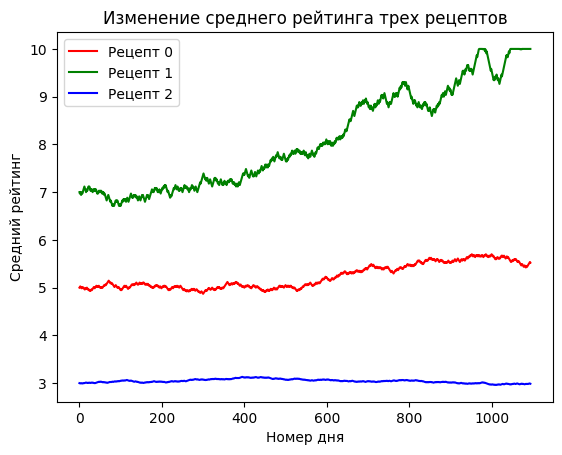

In [7]:
import numpy as np
import matplotlib.pyplot as plt

ratings = np.load('data/average_ratings.npy')

import numpy as np
print(ratings)


# создаем массив дней
days = np.arange(len(ratings[0]))

# задаем цвета для каждого рецепта
colors = ['red', 'green', 'blue']

# строим график для каждого рецепта
for i in range(len(ratings)):
    plt.plot(days, ratings[i], color=colors[i], label='Рецепт {}'.format(i))

# добавляем подписи осей и заголовок
plt.xlabel('Номер дня')
plt.ylabel('Средний рейтинг')
plt.title('Изменение среднего рейтинга трех рецептов')

# добавляем легенду
plt.legend()

# выводим график на экран
plt.show()


2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


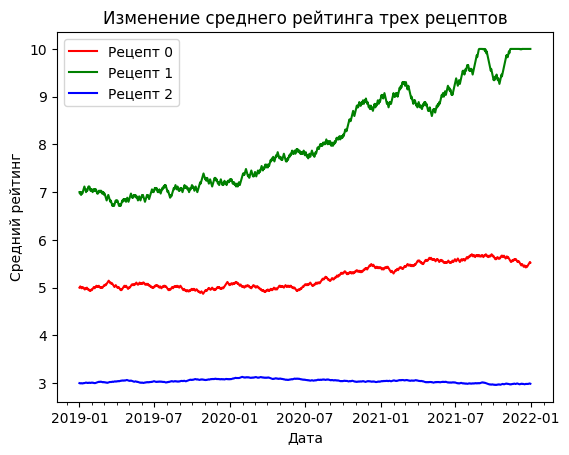

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

ratings = np.load('data/average_ratings.npy')

# создаем массив дат
start_date = datetime(2019, 1, 1)
end_date = datetime(2021, 12, 31) # исправлено
delta = timedelta(days=1)
dates = mdates.drange(start_date, end_date, delta)

# задаем цвета для каждого рецепта
colors = ['red', 'green', 'blue']

# строим график для каждого рецепта
for i in range(len(ratings)):
    plt.plot(dates, ratings[i], color=colors[i], label='Рецепт {}'.format(i))

# добавляем подписи осей и заголовок
plt.xlabel('Дата')
plt.ylabel('Средний рейтинг')
plt.title('Изменение среднего рейтинга трех рецептов')

# добавляем легенду
plt.legend()

# настраиваем ось X
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())

# выводим график на экран
plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

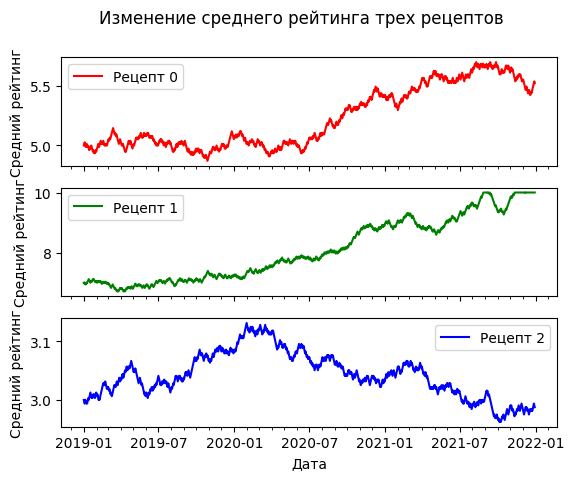

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

ratings = np.load('data/average_ratings.npy')

# создаем массив дат
start_date = datetime(2019, 1, 1)
end_date = datetime(2021, 12, 31)
delta = timedelta(days=1)
dates = mdates.drange(start_date, end_date, delta)

# задаем цвета для каждого рецепта
colors = ['red', 'green', 'blue']

# создаем три изображения и задаем им общую горизонтальную ось
fig, axs = plt.subplots(3, 1, sharex=True)

# строим график для каждого рецепта на соответствующем изображении
for i in range(len(ratings)):
    axs[i].plot(dates, ratings[i], color=colors[i], label='Рецепт {}'.format(i))
    axs[i].set_ylabel('Средний рейтинг') # добавляем подпись оси Y
    axs[i].legend() # добавляем легенду

# добавляем общую подпись оси X и форматируем ее
plt.xlabel('Дата')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())

# добавляем заголовок
fig.suptitle('Изменение среднего рейтинга трех рецептов')

# выводим график на экран
plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


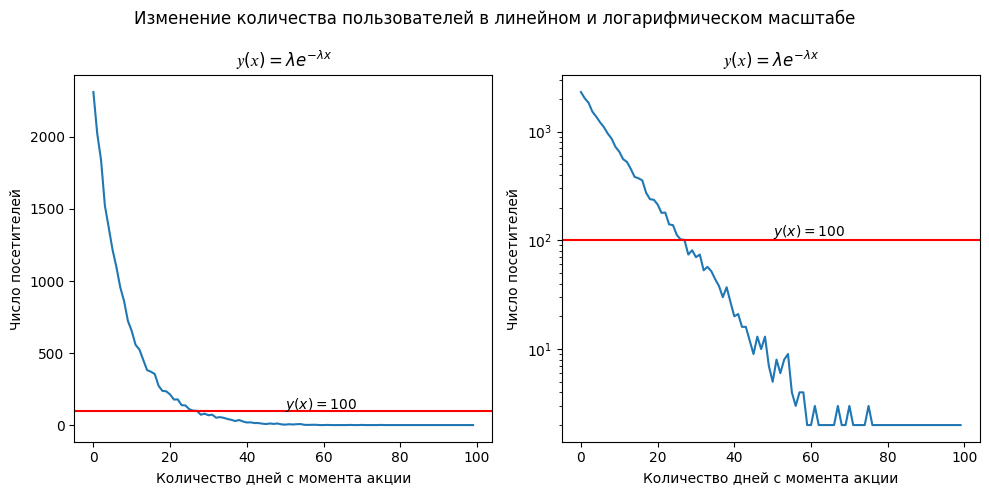

In [40]:
import numpy as np
import matplotlib.pyplot as plt

visitors = np.load('data/visitors.npy')

# Линейный масштаб осей
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(visitors)
ax[0].set_xlabel('Количество дней с момента акции')
ax[0].set_ylabel('Число посетителей')
ax[0].set_title(r'$𝑦(𝑥)=\lambda e ^{-\lambda x}$')
ax[0].axhline(y=100, color='r', linestyle='-')
ax[0].text(50, 110, r'$y(x) = 100$')

# Логарифмический масштаб вертикальной оси
ax[1].plot(visitors)
ax[1].set_yscale('log')
ax[1].set_xlabel('Количество дней с момента акции')
ax[1].set_ylabel('Число посетителей')
ax[1].set_title(r'$𝑦(𝑥)=\lambda e ^{-\lambda x}$')
ax[1].axhline(y=100, color='r', linestyle='-')
ax[1].text(50, 110, r'$y(x) = 100$')

plt.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')
plt.tight_layout()
plt.show()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [4]:
import pandas as pd

reviews = pd.read_csv('data/reviews_sample.csv')
recipes = pd.read_csv('data/recipes_sample.csv')

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

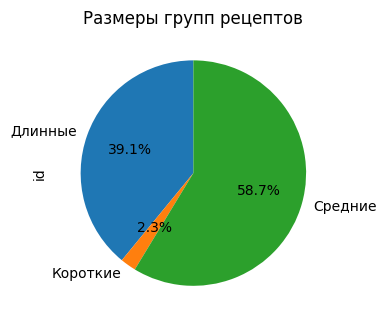

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings

warnings.filterwarnings('ignore')

recipes = pd.read_csv('data/recipes_sample.csv')

# создаем новый столбец с категорией рецепта
conditions = [
    (recipes['minutes'] < 5),
    (recipes['minutes'] >= 5) & (recipes['minutes'] < 50),
    (recipes['minutes'] >= 50)
]
values = ['Короткие', 'Средние', 'Длинные']
recipes['category'] = pd.Series(np.select(conditions, values))

# группируем по категории и считаем среднее количество шагов и размер группы
grouped_recipes = recipes.groupby('category').agg({'n_steps': 'mean', 'id': 'size'})

# строим столбчатую диаграмму
ax1 = grouped_recipes['n_steps'].plot(kind='bar', figsize=(8,6), color='blue', alpha=0.7)
ax1.set_title('Средняя длительность по группам рецептов')
ax1.set_xlabel('Группа рецептов')
ax1.set_ylabel('Средняя длительность')
ax1.set_xticklabels(['Короткие', 'Средние', 'Длинные'], rotation=0)

# строим круговую диаграмму
ax2 = plt.subplot(1, 2, 2)
grouped_recipes['id'].plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90, legend=False)
ax2.set_title('Размеры групп рецептов')

plt.show()


6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

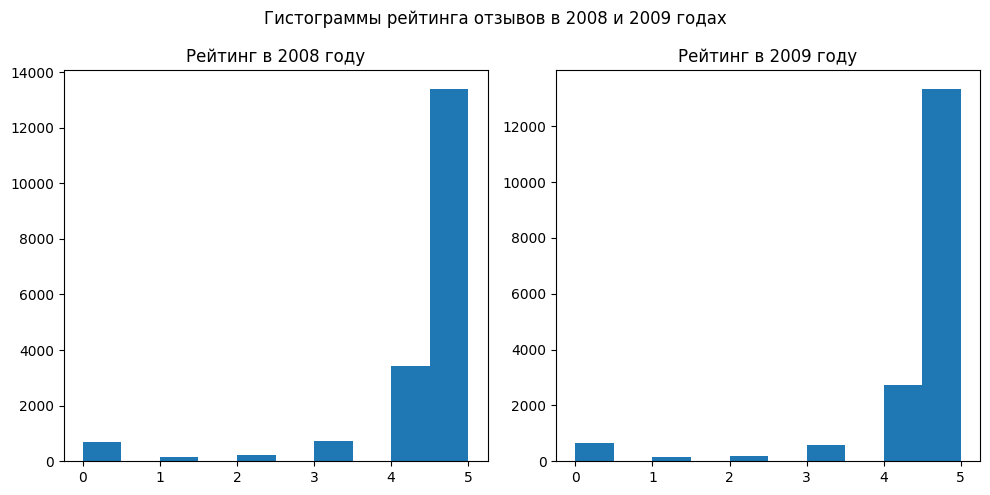

In [11]:
import pandas as pd

reviews = pd.read_csv('data/reviews_sample.csv')

reviews['date'] = pd.to_datetime(reviews['date'])
reviews_08_09 = reviews[(reviews['date'].dt.year == 2008) | (reviews['date'].dt.year == 2009)]

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].hist(reviews_08_09[reviews_08_09['date'].dt.year == 2008]['rating'], bins=10)
ax[1].hist(reviews_08_09[reviews_08_09['date'].dt.year == 2009]['rating'], bins=10)
ax[0].set_title('Рейтинг в 2008 году')
ax[1].set_title('Рейтинг в 2009 году')
fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')
plt.tight_layout()
plt.show()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

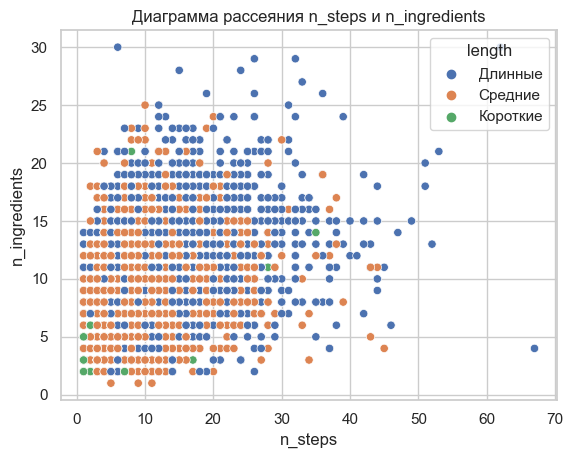

In [17]:

import seaborn as sns

recipes = pd.read_csv('data/recipes_sample.csv')

def recipe_length(minutes):
    if minutes < 5:
        return 'Короткие'
    elif minutes < 50:
        return 'Средние'
    else:
        return 'Длинные'

    
sns.set(style='whitegrid')

recipes['length'] = recipes['minutes'].apply(recipe_length)

sns.scatterplot(x='n_steps', y='n_ingredients', hue='length', data=recipes)

plt.title('Диаграмма рассеяния n_steps и n_ingredients')

plt.show()


Визуально линейной зависимости между количеством шагов и ингредиентов не наблюдается.

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

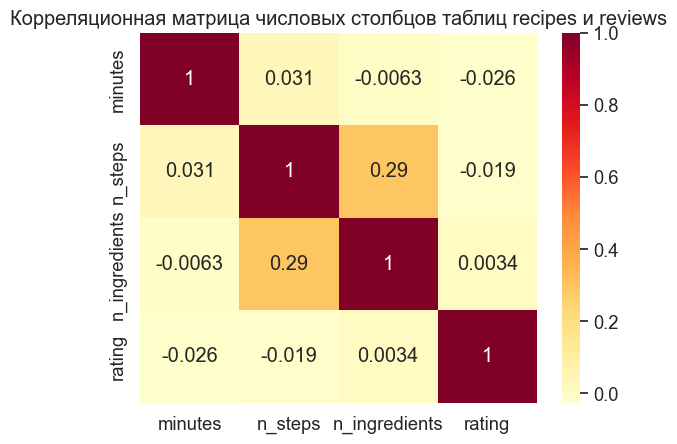

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

recipes = pd.read_csv("data/recipes_sample.csv")
reviews = pd.read_csv("data/reviews_sample.csv")

#merged = pd.merge(recipes, reviews, on="id")
merged = pd.merge(recipes, reviews, left_on="id", right_on="recipe_id")


corr_matrix = merged[["minutes", "n_steps", "n_ingredients", "rating"]].corr()

sns.set(font_scale=1.2)
sns.heatmap(corr_matrix, annot=True, cmap="YlOrRd")

plt.title("Корреляционная матрица числовых столбцов таблиц recipes и reviews")
plt.show()